The following cell adds Xi0Stat to your local path. This way you will be able to import functions as if you were working in the Xi0Stat folder

In [1]:
import sys  

# add here the path to your local folder where Xi0Stat is saved
sys.path.insert(0, '/Users/Michi/Dropbox/Local/statistical_method_schutz_data_local/Xi0Stat') 

In [4]:
# Import all there is in GW, galaxy, GWgalaxy

from GW import *
from galaxy import *
from GWgalaxy import *

In [5]:
k='0.01'
float(k)

0.01

## LOAD DATA

#### Load GW data

First, we import the GW skymaps. The function get_all_O2 takes as input the folder where the skymaps are. 
If subset_names is not specified, it loads all the skymaps in the folder. If subset_names is specified, it loads data only for the corresponding event.


You can also entry the path where the metadata of the event are saved (estimated masses, luminosity distance, etc. ). These metadata correspond to those visible in the table here: https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/

They should be saved as a .csv file (downloadable from the above link, at the bottom of the page)
Metadata are used to read the quoted luminosity distance value (but this is not the only option, see below)

Note: if you find errors when you don't use metadata, let me know. It is better to use them

In [6]:
# Folder where data are stored locally
data_root='/Users/Michi/Dropbox/Local/Physics_projects/statistical_method_schutz_data_local/'

# Folder where the GW skymaps are located
O2_loc = data_root+'GWs/O2_skymaps/'

# metadata
meta_path = '/Users/Michi/Dropbox/Local/Physics_projects/statistical_method_schutz_data_local/GWs/GWTC-1-confident.csv'


In [7]:
O2 = get_all_O2(O2_loc, subset=True, subset_names=['GW170817'], 
                meta_path=meta_path)

--- GW events:
['GW170817']
Reading skymaps....
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Event name: GW170817 

['GW170817']


#### Load galaxy catalogue and instantiate a GWGalaxy object

The GWGalaxy object contains a skymap_3D object for each GW event, and a GalCat object for GLADE.
The skymaps have been created before and are passed in the instantiation (O2 in this case), while the catalogue can be either loaded in advance and passed to the instantiation, or we can just specify its path and the options and it will be loaded. This is what we do here.

In [8]:
# path where GLADE is saved
GLADE_PATH = '/Users/Michi/Dropbox/Local/Physics_projects/statistical_method_schutz_data_local/galaxy_catalogues/GLADE_2.4.txt'
  
# column names for GLADE
colnames = ['PGC', 'GWGC name', 'HyperLEDA_name', '2MASS_name', 'SDSS-DR12_name', 'flag1', 'RA', 'dec', 
            'dist', 'dist_err', 'z', 'B', 'B_err', 'B_Abs', 'J', 'J_err', 'H', 'H_err', 'K', 'K_err',
            'flag2', 'flag3']

# sublist of columns to keep
col_list=   ['PGC', 'GWGC name','HyperLEDA_name','RA', 'dec', 'dist', 'z',  'B', 'K', 'flag2']


The input options for the GWGalaxy objects for loading GLADE are the same as in the funciton edit_catalogue. Refer to that to check all teh availbale possibilities.

Here we do:
    - drop galaxies with no  value for luminosity distance
    - drop HyperLeda galaxies with flag2=2 (drop_HyperLeda2=True)
    - Compute cosmological redshift with cosmo given by H0=70, Om0=0.27 
        The result will be stored in a new column 'z_cosmo'
    - Correct 'z_cosmo' for CMB and group velocities. Result will be stored in a column 'z_cosmo_corr'
    - Add B an K luminosities . Results will be stored in columns B_Lum and K_Lum 
    - Add errors on redshift with average GLADE values (err_vals='GLADE')
    
Relevant parameters:
     - 'which_z' is a string specifying the name of the redshift column that will be used during the analysis.
         Here we correct for CMB and the result will be stored in the column 'z_corr', so to use the CMB corrected redshift we specify which_z='z_corr'. 
         For example, if one does not want to use the CMB correction, he/she can give which_z='z_cosmo' to use the cosmological redshift, or 'z' to use the original GLADE redshift
     - 'which_z_correct' is a string specifying the name of the redshift column that will be corrected for CMB motion. After the discussion we had, it should be set to 'z_cosmo'

In [37]:
GWGal_GLADE = GWGalaxy(O2, meta_path=meta_path,
                       galCat_path=GLADE_PATH, colnames=colnames, col_list=None, 
                        H0=70, Om0=0.27,
                        B_band_select=False, K_band_select=False, add_B_lum=True, add_K_lum=True, MBSun=5.498, 
                        drop_z_uncorr=False,
                       drop_no_dist=True,
                       get_cosmo_z=True,
                       which_z='z_cosmo_corr', 
                       CMB_correct=True, 
                       group_correct=True,
                       which_z_correct='z_cosmo',
                       pos_z_cosmo=False, 
                       z_flag=None,
                       err_vals='GLADE', 
                       drop_HyperLeda2=True
                      ) 

--- Loading data for catalogue GLADE_2.4.txt ...


/Users/Michi/miniconda3/envs/snakes/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Done.
N. of objects: 3263611
Keeping only galaxies with known value of luminosity distance...
Kept 2722493 points or 83% of total
Dropping galaxies with HyperLeda name=null and flag2=2...
Kept 2720966 points or 83% of total
Computing cosmological redshifts from given luminosity distance with H0=70.0 km / (Mpc s), Om0=0.27...
Interpolating between z_min=0, z_max=6.49511599474
Correcting z_cosmo for group velocities...
Correcting z_cosmo for CMB reference frame...
Adding errors on z with GLADE values


/Users/Michi/Dropbox/Local/Physics_projects/statistical_method_schutz_data_local/Xi0Stat/utils.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.z_lowerbound[df.z_lowerbound < 0] = 0
/Users/Michi/Dropbox/Local/Physics_projects/statistical_method_schutz_data_local/Xi0Stat/utils.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.z_lower[df.z_lower < 0.5*df[which_z]] = 0.5*df[which_z]


Computing total luminosity in B band...


/Users/Michi/Dropbox/Local/Physics_projects/statistical_method_schutz_data_local/Xi0Stat/utils.py:282: RuntimeWarning: invalid value encountered in log10
  df.loc[:,"B_Abs"]=df.B-5*np.log10(my_dist)-25


Computing total luminosity in K band...


/Users/Michi/Dropbox/Local/Physics_projects/statistical_method_schutz_data_local/Xi0Stat/utils.py:294: RuntimeWarning: invalid value encountered in log10
  df.loc[:,"K_Abs"]=df.K-5*np.log10(my_dist)-25


Done.
As a redshift, I am using the column z_cosmo_corr

 --- GW events: 
GW170817


In [38]:
# Example of the result. The galaxy catalogue is stored in GWGal_GLADE.galCat.cat 
# Let's access it 

GWGal_GLADE.galCat.cat.head()

,PGC,GWGC name,HyperLEDA_name,2MASS_name,SDSS-DR12_name,flag1,RA,dec,dist,dist_err,...,z_cosmo_or,group_correction,z_cosmo_corr,Delta_z,z_lowerbound,z_lower,z_upper,z_upperbound,B_Lum,K_Lum
0,43495.0,NGC4736,NGC4736,12505314+4107125,NaN,G,192.721451,41.120152,4.245715,NaN,...,0.000991,1,0.001634,0.00015,0.001184,0.001484,0.001784,0.002084,2.346736,8.544058
1,41934.0,NGC4548,NGC4548,12352642+1429467,NaN,G,188.860123,14.496320,17.700979,NaN,...,0.004120,1,0.005513,0.00015,0.005063,0.005363,0.005663,0.005963,4.065821,12.904710
2,60921.0,NGC6503,NGC6503,17492651+7008396,NaN,G,267.360474,70.144341,4.285351,NaN,...,0.001000,1,-0.000124,0.00015,0.000000,-0.000062,0.000026,0.000326,NaN,NaN
3,40950.0,NGC4442,NGC4442,12280389+0948130,NaN,G,187.016220,9.803620,15.275919,NaN,...,0.003557,1,0.005557,0.00015,0.005107,0.005407,0.005707,0.006007,2.755565,12.960170
4,41164.0,NGC4469,NGC4469,NaN,NaN,G,187.367000,8.749890,17.783360,NaN,...,0.004139,1,0.005561,0.00015,0.005111,0.005411,0.005711,0.006011,0.992631,NaN


In [39]:
# This is NGC4993 (host of GW170817) 
NGC4993 = GWGal_GLADE.galCat.cat[GWGal_GLADE.galCat.cat['GWGC name']=='NGC4993']
NGC4993

,PGC,GWGC name,HyperLEDA_name,2MASS_name,SDSS-DR12_name,flag1,RA,dec,dist,dist_err,...,z_cosmo_or,group_correction,z_cosmo_corr,Delta_z,z_lowerbound,z_lower,z_upper,z_upperbound,B_Lum,K_Lum
2086034,45657.0,NGC4993,NGC4993,13094770-2323017,NaN,G,197.448776,-23.383831,41.776044,NaN,...,0.00968,1,0.011026,0.00015,0.010576,0.010876,0.011176,0.011476,1.954709,8.548348


In [40]:
# Statistics
GWGal_GLADE.galCat.cat.describe()

,PGC,RA,dec,dist,dist_err,z,B_err,J,J_err,H,...,z_cosmo_or,group_correction,z_cosmo_corr,Delta_z,z_lowerbound,z_lower,z_upper,z_upperbound,B_Lum,K_Lum
count,5.176700e+04,2.720966e+06,2.720966e+06,2.720966e+06,2.00000,2.720966e+06,735517.000000,987830.000000,987823.000000,972162.000000,...,2.720966e+06,2.720966e+06,2.720966e+06,2.720966e+06,2.720966e+06,2.720966e+06,2.720966e+06,2.720966e+06,1.612505e+06,9.916960e+05
mean,9.763927e+05,1.752218e+02,1.089782e+01,2.786936e+03,10.19600,3.992778e-01,0.458082,14.530476,0.080893,13.774386,...,3.992618e-01,4.931337e-03,3.994011e-01,1.357461e-02,3.595810e-01,3.859715e-01,4.129757e-01,4.401250e-01,3.403998e+00,2.047912e+01
std,1.447502e+06,9.740466e+01,3.115992e+01,5.838338e+03,14.41225,6.763242e-01,0.088678,0.816406,0.035547,0.813428,...,6.761885e-01,7.005013e-02,6.762335e-01,4.374398e-03,6.737946e-01,6.754763e-01,6.769359e-01,6.784231e-01,1.260148e+02,1.158056e+02
min,2.000000e+00,4.500000e-04,-8.987641e+01,0.000000e+00,0.00500,-5.500000e-04,0.020000,4.874000,0.001000,4.143000,...,0.000000e+00,0.000000e+00,-1.995272e-03,1.500000e-04,0.000000e+00,-9.976359e-04,-7.844628e-04,-4.844628e-04,6.774010e-11,2.202145e-10
25%,3.521450e+04,1.188881e+02,-3.675922e+00,3.602361e+02,5.10050,7.923400e-02,0.400000,14.187000,0.059000,13.441000,...,7.923372e-02,0.000000e+00,7.937598e-02,1.500000e-02,4.214642e-02,6.679816e-02,9.239669e-02,1.197862e-01,1.304512e+00,7.271905e+00
50%,7.144100e+04,1.777020e+02,1.222648e+01,6.918310e+02,10.19600,1.454530e-01,0.500000,14.714000,0.077000,13.971000,...,1.454520e-01,0.000000e+00,1.454872e-01,1.500000e-02,1.059198e-01,1.318664e-01,1.594863e-01,1.883344e-01,2.462199e+00,1.321863e+01
75%,1.463626e+06,2.329180e+02,3.282669e+01,2.070140e+03,15.29150,3.813174e-01,0.500000,15.058000,0.099000,14.302000,...,3.813097e-01,0.000000e+00,3.819648e-01,1.500000e-02,3.369684e-01,3.669660e-01,3.969647e-01,4.269642e-01,3.915412e+00,2.359712e+01
max,4.715229e+06,3.600000e+02,8.977647e+01,6.546360e+04,20.38700,6.485116e+00,7.140000,80.379000,9.900000,99.000000,...,6.482787e+00,1.000000e+00,6.483668e+00,1.500000e-02,6.438668e+00,6.468668e+00,6.498668e+00,6.528668e+00,1.017018e+05,2.923253e+04


## EXAMPLES

#### 1. Find galaxies inside the 99% credible region

The function GWGal_GLADE.find_gal allows to find and plot GLADE galaxies inside the credible region of specified probability

In [41]:
# Specify the event of interest, 
# n. of standard deviations for the luminosity distance value, 
# and confidence level for the angular part
event_name='GW170817' 
std_number=3.
level=0.99

In [42]:
# Compure max and min redshifts compatible with prior range and luminosity distance values. 
# If position_val='header' , the luminosisty distance mean and std are taken from the skymap header
# Specify a non null value of H0 to use the H0 prior range (default is Xi_0). 
# This value will not be relevant for the computation

(z_min, z_max) = GWGal_GLADE._get_z_range( event_name, std_number=std_number, H0=70, 
        Verbose=True, position_val='header') #GWGal_GLADE.z_min[event_name+'header'], GWGal_GLADE.z_max[event_name+'header'] 
print((z_min, z_max))


 Computing range in redshift for all priors...
Using H0=220.0 km / (Mpc s)
Position: 38.03408225450563 +7.499686641911211 -7.499686641911211
lower limit to search: d_L = 15.535022328771994 Mpc, z=0.011298794026695699
upper limit to search:d_L = 60.53314218023926 Mpc, z=0.04296949596717247
Using H0=10.0 km / (Mpc s)
Position: 38.03408225450563 +7.499686641911211 -7.499686641911211
lower limit to search: d_L = 15.535022328771994 Mpc, z=0.0005179786314693549
upper limit to search:d_L = 60.53314218023926 Mpc, z=0.002015929356290118
Using z_min, z_max with key GW170817header3.0
 z_min, z_max = 0.0005179786314693549, 0.04296949596717247
(0.0005179786314693549, 0.04296949596717247)


GW170817 - Finding galaxies inside 99% probability region and in the redshift range [0.0005179786314693549 , 0.04296949596717247]
243 galaxies found 
Interpolating contours...


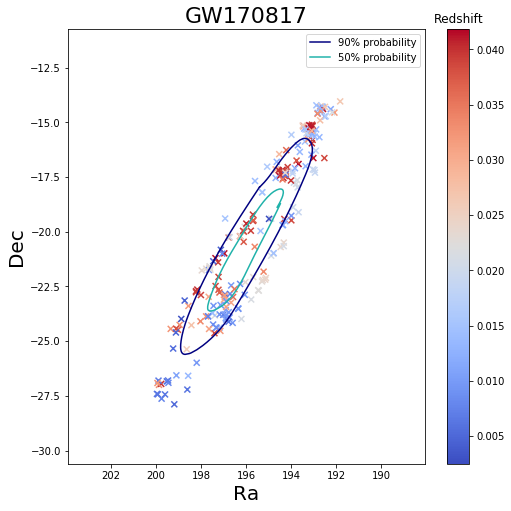

In [43]:
inside_gal_df, _ = GWGal_GLADE.find_gal(
                                            event_name='GW170817', 
                                            use_credible_regions=True, 
                                            level=level, 
                                            minmax_z =  (z_min, z_max), 
                                            plot=True, get_contours=True, 
                                            Verbose=True, band='B', L_star_frac=0., 
                                            )

## POSTERIOR FOR H0

Here we compute the posterior for H0. 
This is done by the function GWGal_GLADE.posterior . It takes a value of H0 as input and returns likelihood and beta for that value. So, we define a grid of values of H0 and call GWGal_GLADE.posterior  with a for loop

Relevant parameters:

    - complete=False does not apply completion (best to use this so far)
    - beta_scheme can be :
            * 'cat', in which case the beta is computed from the catalogue. 
            * 'uniform', in which case the beta is computed from the uniform distribution
    - band: 'B' or 'K', the band to use in the selection and weighting
    - L_star_frac: list of floats. Thresholds in luminosity 
    - position_val: use 'header' !
    - lum_weighting : True or False. Whether to apply luminosity weighting when computing the likelihood
    - z_err: Include  error on redshifts 
    
    
Output: a np array of dimension (  5, n_GW_events)

Rows: 
* 0 : Likelihood - catalogue part
* 1 : Likelihood - completion part
* 2 : beta - catalogue part
* 3 : beta - completion part
* 4 : prior

In [44]:
# Grid of H0 values
H0grid= np.linspace(PRIOR_LOW_H0,PRIOR_UP_H0, 100 )

In [45]:
level=0.99
std_number=3.


In [49]:
%%time
log_post_grid = {}
ks=(0.6,) # THRESHOLDS IN LUMINOSITY


for k in ks:
    print(k)
    log_post_grid[str(k)]  = np.array([GWGal_GLADE.posterior( H0=H0i, 
                                                             search_method = 'credible_region',  
                                                             level=level, std_number=std_number,
                                                            complete=False, 
                                                            Verbose=False, beta_scheme='cat', 
                                                            band='B', L_star_frac=k, position_val='header' ,
                                                            lum_weighting=False, z_err=True) 
                          for H0i in H0grid])

0.6
Using df_ind: GW170817credible_regionheader0.993.0
GW170817 - Finding galaxies inside 99% probability region and in the redshift range [0.0005179786314693549 , 0.04296949596717247]
243 galaxies found 
GW170817 - 82 galaxies found with B lum >0.6 L* 
Not completing
- Computing likelihood for catalogue part for GW170817 and search method=credible_region....
Convolving with redshift error
- Done for GW170817 . 

CPU times: user 3min 34s, sys: 18.9 s, total: 3min 53s
Wall time: 3min 49s


In [50]:
# I stored the result in a dictionary with keys equal to the luminosity threshold.
print(log_post_grid.keys())


dict_keys(['0.6'])


In [53]:
# Each value is a np array of shape (n_points_H0 , 5, n_GW_events)
# The 5 are the 5 rows of the output of posterior, described above
log_post_grid['0.6'].shape

(100, 5, 1)

In [54]:
# Now extract likelihood, beta for each cut in luminosity

def get_grids(log_post_grid):
    
    GWgal_L_cat = log_post_grid[:,0, :]
    GWgal_L_miss = log_post_grid[:,1, :]
    betas_cat = log_post_grid[:,2, :]
    betas_miss = log_post_grid[:,3, :]
    prior_grid = log_post_grid[:,4, :]
    return GWgal_L_cat, GWgal_L_miss, betas_cat, betas_miss, prior_grid

GWgal_L_cat = {}
GWgal_L_miss = {}
betas_cat = {}
betas_miss = {}
prior_grid = {}


for k in ks:
    GWgal_L_cat[str(k)], GWgal_L_miss[str(k)], betas_cat[str(k)],betas_miss[str(k)], prior_grid[str(k)] = get_grids(log_post_grid[str(k)])

Plot the result

In [55]:
def plot_post(points_grid, GWgal_L_cat, GWgal_L_miss, betas_cat, betas_miss, prior_grid, GWgal, param_name='H0'):

    import matplotlib.pyplot as plt      
    names=[e for e in GWgal.GWevents.keys()]
    fig, ax = plt.subplots(1, figsize=(10,8))
    grids = {str(k): np.empty(GWgal_L_cat[str(ks[0])].shape) for k in ks}
    norms = {str(k):np.empty(GWgal_L_cat[str(ks[0])].shape[1]) for k in ks}
    for k in ks:
        grids[str(k)]=[]
        for i in range(GWgal_L_cat[str(k)].shape[1]):
            grid_miss = ((GWgal_L_miss[str(k)][:,i])/(betas_cat[str(k)][:,i]+betas_miss[str(k)][:,i]))*prior_grid[str(k)][:,i]
            grid_cat = ((GWgal_L_cat[str(k)][:,i])/(betas_cat[str(k)][:,i]+betas_miss[str(k)][:,i]))*prior_grid[str(k)][:,i]
            grid=grid_miss+grid_cat
        
            # Normalize to 1
            norm = np.trapz(grid, points_grid) 
            try:
                grids[str(k)][:,i] = grid
                norms[str(k)][:,i] = norm
            except TypeError:
                grids[str(k)][:] = grid
                norms[str(k)][:]=norm
        
            ax.plot(points_grid, grid/norm, label= names[i]+r' $L>%s L_*$' %k)
    ax.plot(points_grid, prior_grid[str(k)], label= 'prior', ls='--', color='b', alpha=0.3)
    #ax.plot(H0grid, full_post, label= 'Counterpart', ls='-.')        
    

    #ax.set_ylim(0, 0.01)
    if param_name=='H0':
        x_max_plt = PRIOR_UP_H0
        x_min_plt = PRIOR_LOW_H0
    else:
        x_max_plt = PRIOR_UP
        x_min_plt = PRIOR_LOW
    ax.set_xlim(x_min_plt,x_max_plt)
    ax.set_xlabel(param_name, fontsize=20)
    ax.set_ylabel(r'$p(%s)$' %param_name, fontsize=20);
    ax.legend(fontsize=14);
    #ax.set_yscale('log')
    
    return fig, ax

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1218bd0f0>)

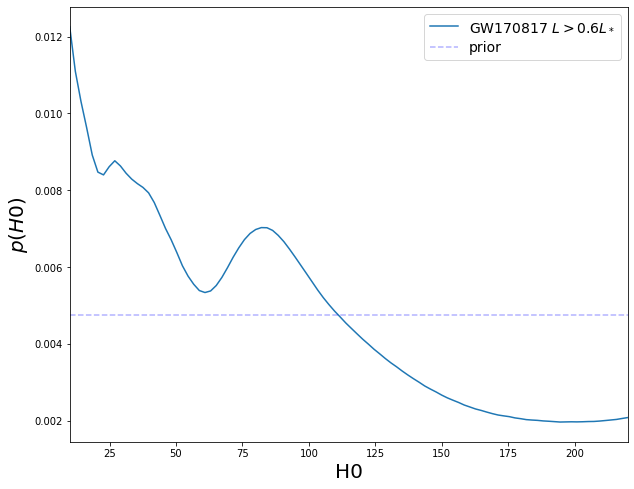

In [56]:
plot_post(H0grid, GWgal_L_cat, GWgal_L_miss, betas_cat, betas_miss, prior_grid, GWGal_GLADE, param_name='H0')

You can now have fun with other GW events (just change the name when loading the GW data ! ), or combining more than 1 (enter a list of event names)

## EXTRAS

#### Plot the beta for all luminosity cuts

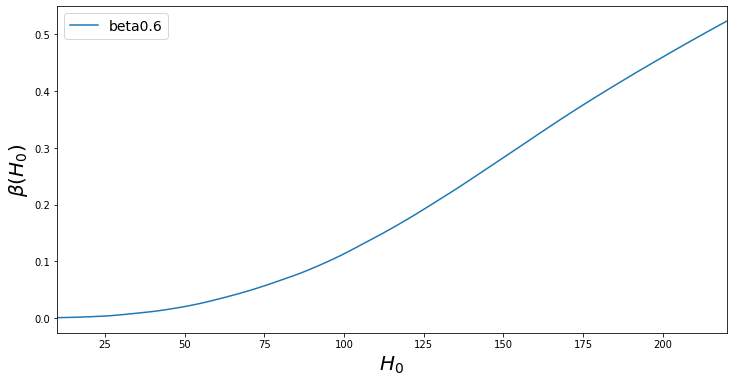

In [57]:

import matplotlib.pyplot as plt   
grids={}
names=[e for e in GWGal_GLADE.GWevents.keys()]
fig, ax = plt.subplots(1, figsize=(12,6))
for k in ks:
    grids[str(k)]=[]
    for i in range(GWgal_L_cat[str(k)].shape[1]):
        grid_b = betas_cat[str(k)][:,i]#+betas_miss[str(k)][:,i]
        ax.plot(H0grid, grid_b, label= 'beta'+str(k))
        
    
#ax.set_ylim(0, 0.008)
ax.set_xlim(10,PRIOR_UP_H0)
ax.set_xlabel(r'$H_0$', fontsize=20)
ax.set_ylabel(r'$\beta(H_0)$', fontsize=20);
ax.legend(fontsize=14)
#ax.set_yscale('log')

### XI0

Note: one shoould re-instantiate a GWGal_GLADE object before computing posterior for Xi0. Here I don't do it to save space, but in this case the galaxies used will be those in the redshift range computed for H0 and not for Xi0 


In [59]:
%%time
Xi0grid= np.linspace(PRIOR_LOW,PRIOR_UP, 100 )

log_post_grid_XI0 = {}
ks=(0.6, ) # THRESHOLDS IN LUMINOSITY


for k in ks:
    print(k)
    log_post_grid_XI0[str(k)]  = np.array([GWGal_GLADE.posterior( Xi0=Xi0i, 
                                                             search_method = 'credible_region',  
                                                             level=level, std_number=std_number,
                                                            complete=False, 
                                                            Verbose=False, beta_scheme='cat', 
                                                            band='B', L_star_frac=k, position_val='header' ,
                                                            lum_weighting=False, z_err=True) 
                          for Xi0i in Xi0grid])

0.6
GW170817 - 82 galaxies found with B lum >0.6 L* 
Not completing
- Computing likelihood for catalogue part for GW170817 and search method=credible_region....
Convolving with redshift error
- Done for GW170817 . 

CPU times: user 3min 35s, sys: 19.1 s, total: 3min 54s
Wall time: 3min 49s


In [60]:
GWgal_L_cat_Xi0 = {}
GWgal_L_miss_Xi0 = {}
betas_cat_Xi0 = {}
betas_miss_Xi0 = {}
prior_grid_Xi0 = {}


for k in ks:
    GWgal_L_cat_Xi0[str(k)], GWgal_L_miss_Xi0[str(k)], betas_cat_Xi0[str(k)],betas_miss_Xi0[str(k)], prior_grid_Xi0[str(k)] = get_grids(log_post_grid_XI0[str(k)])

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1373d87f0>)

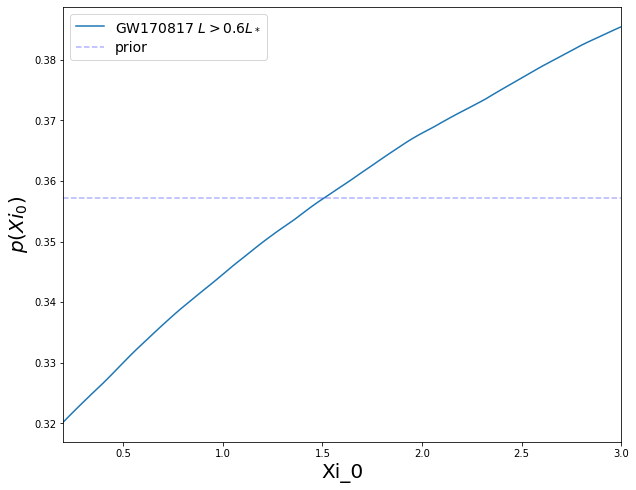

In [61]:
plot_post(Xi0grid, GWgal_L_cat_Xi0, GWgal_L_miss_Xi0, betas_cat_Xi0, betas_miss_Xi0, prior_grid_Xi0, GWGal_GLADE, param_name='Xi_0')
